In [1]:
from EBL_forecast import * 
import EBL_plots_paper as p 

Note: redshifts have been re-sorted (earliest first)


Text(0, 0.5, '$f_{\\rm LyC}$')

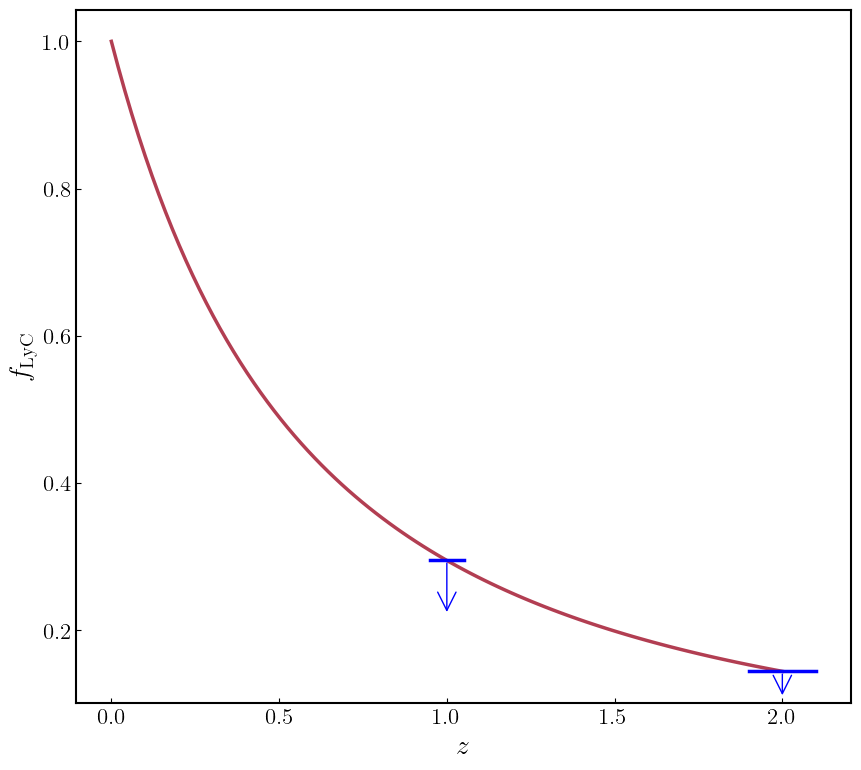

In [24]:

logf_LyC1, logf_LyC2 = fiducials['fescape']
CLyC = (logf_LyC2 - logf_LyC1) / (np.log10((1+2.)/(1+1.)))
f_LyC = lambda z: pow(10,CLyC * np.log10((1.+z)/(1.+1)) + logf_LyC1)

z = np.linspace(0.,2.,100)
plt.plot(z,f_LyC(z))

plt.plot(1.,10**-0.53)
plt.plot(2.,10**-0.84)

arrow_length = 0.05
plt.plot([1*(1-arrow_length), 1*(1+arrow_length)], [10**-0.53, 10**-0.53], color='blue')
plt.annotate('', xy=(1, 10**-.53*(1- 5*arrow_length)), xytext=(1, 10**-0.53),
            arrowprops=dict(arrowstyle='->', color='blue'))

plt.plot([2*(1-arrow_length), 2*(1+arrow_length)], [10**-0.84, 10**-0.84], color='blue')
plt.annotate('', xy=(2, 10**-.84*(1- 5*arrow_length)), xytext=(2, 10**-0.84),
            arrowprops=dict(arrowstyle='->', color='blue'))

plt.xlabel(r'$z$')
plt.ylabel(r'$f_{\rm LyC}$')

In [5]:
rho_crit = (3*H(0)**2/(8*np.pi*cu.G)).to(u.Msun*u.Mpc**-3)

# from Jose's paper
f_gg = 1 # good for axions
F_g = 0 # sets stimulated decay due to CMB - check different values


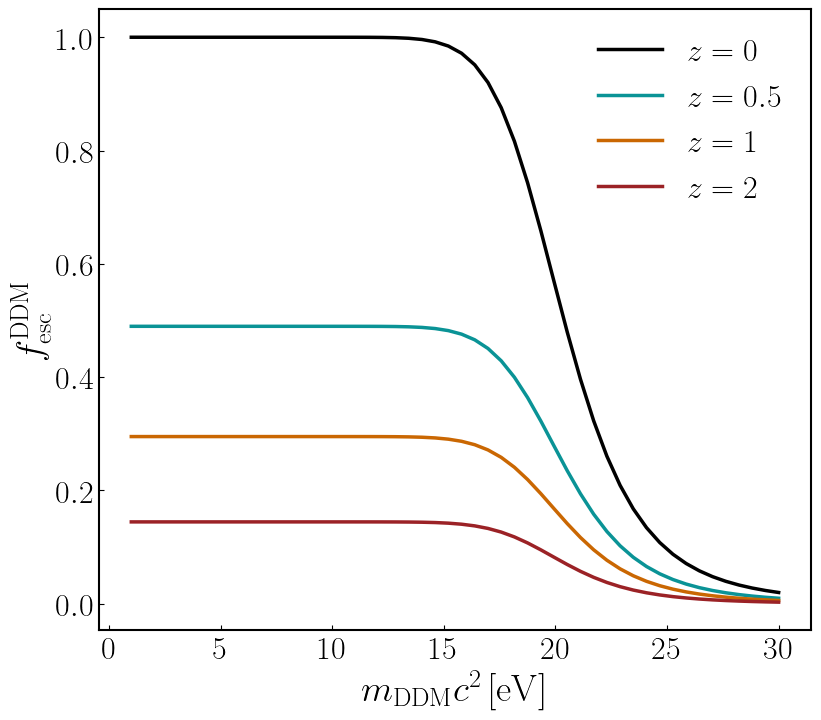

In [6]:
logaddexp = lambda x,y: x + np.log(1 + np.exp(y - x)) if (x > y) else y + np.log(1 + np.exp(x - y))

sigmoid = lambda lambda_rest: np.exp(-logaddexp(0, -(lambda_rest.value - (1216*u.AA).value) / 100))

test_masses = np.linspace(1,30)
lambda_rest = np.zeros(len(test_masses))
sigm = np.zeros(len(test_masses))
for i in range(len(test_masses)):
    lambda_rest[i] = (lambda_from_nu((test_masses[i]*u.eV / (4*np.pi*cu.hbar)).to(u.Hz)).value)
    sigm[i] = sigmoid(lambda_rest[i]*u.Hz)


colors_z = ['k','#0a9396','#ca6702','#9b2226']

plt.figure(figsize=(9,8))
fontsize_label = 27
fontsize_legend = 23
fontsize_tick = 23

#plt.plot(test_masses,sigm,color=colors_z[0],label=r'$z = %g$'%0,linewidth=2.5)
val = 0
list_val = [0,0.5,1,2]
for i in list_val:
   plt.plot(test_masses,sigm*fLyC(i,False),color=colors_z[val],label=r'$z = %g$'%i,linewidth=2.5)
   val += 1

plt.xlabel(r'$m_{\rm DDM}c^2\,[{\rm eV}]$',fontsize=fontsize_label)
plt.ylabel(r'$f^{\rm DDM}_{\rm esc}$',fontsize=fontsize_label)

plt.xticks(fontsize=fontsize_tick)
plt.yticks(fontsize=fontsize_tick)

plt.legend(loc=1,fontsize=fontsize_legend)
plt.tight_layout()
plt.savefig(use_results_dir + 'PLOTS/EBL_DM/DM_esc.png')

In [7]:
lambda_obs_min = lambda_from_nu(nu_max_gFUV)
lambda_obs_max = lambda_from_nu(nu_min_US)

nnu = 150
nz = 100

#mc2_DM = np.logspace(-3,3,nm) *u.eV
lambda_DM_obs = np.linspace(lambda_obs_min,lambda_obs_max,nnu)
nu_DM_obs = nu_from_lambda(lambda_DM_obs)
z_vals = np.linspace(0,2.5,nz)

#mc2_DM_matr = mc2_DM[:,np.newaxis]*np.ones((nm,nz))
z_vals_matr = z_vals[:,np.newaxis]*np.ones((nz,nnu))
nu_DM_obs_matr = nu_DM_obs[np.newaxis,:]*np.ones((nz,nnu))

mc2_DM = ((4*np.pi*cu.hbar) * (nu_DM_obs_matr*(1+z_vals_matr))).to(u.eV)

lambda_obs_sigm = lambda_from_nu(nu_DM_obs)
sigmtau = np.zeros((len(z_vals),len(lambda_obs_sigm)))
for i in range(len(lambda_obs_sigm)):
    for j in range(len(z_vals)):
        lambda_rest = (lambda_from_nu((mc2_DM[j,i] / (4*np.pi*cu.hbar)).to(u.Hz)).value)
        sigm = sigmoid(lambda_rest*u.Hz)*fLyC(z_vals[j],False)
        tau = np.exp(-tau_Lya(lambda_obs_sigm[i],z_vals[j]))
        sigmtau[j,i] = sigm * tau

In [8]:
lymanalpha_line = lambda z: 1216*u.AA * (1+z)
lymanbreak = lambda z: 912*u.AA * (1+z)
lya_obs = np.zeros(len(z_vals))
lybr_obs = np.zeros(len(z_vals))
for j in range(len(z_vals)):
    lya_obs[j] = lymanalpha_line(z_vals[j]).value    
    lybr_obs[j] = lymanbreak(z_vals[j]).value

In [40]:
import matplotlib

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

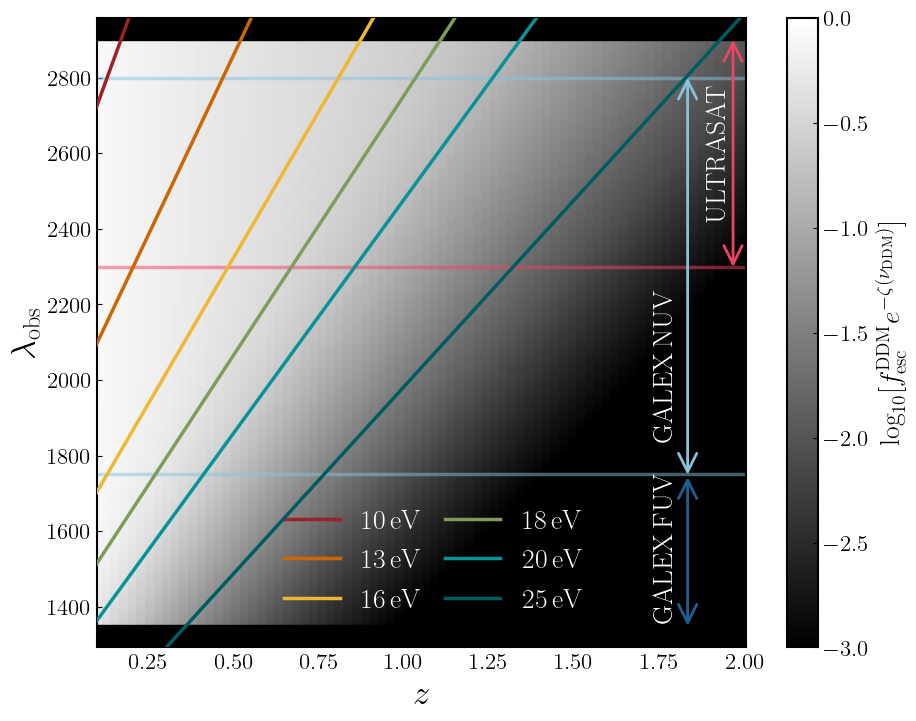

In [51]:
fig = plt.figure(figsize=(10,8))

orig_cmap = matplotlib.cm.gist_gray
#shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.1, name='shifted_' + str(0.1))

pcm = plt.pcolormesh(z_vals, lambda_obs_sigm.value,(np.log10(sigmtau)).T, cmap='gist_gray',vmin = -3,vmax=0)  

fig.colorbar(pcm, label=r'$\log_{10}[f_{\rm esc}^{\rm DDM}e^{-\zeta(\nu_{\rm DDM})}]$')

colors= ['#9b2226','#ca6702','#eeb831','#7f9c5e','#0a9396','#005c63']


lambda_obs_10eV = lambda_from_nu((10*u.eV / (4*np.pi*cu.hbar)).to(u.Hz)/ (1+z_vals))
lambda_obs_13eV = lambda_from_nu((13*u.eV / (4*np.pi*cu.hbar)).to(u.Hz)/ (1+z_vals))
lambda_obs_16eV = lambda_from_nu((16*u.eV / (4*np.pi*cu.hbar)).to(u.Hz)/ (1+z_vals))
lambda_obs_19eV = lambda_from_nu((18*u.eV / (4*np.pi*cu.hbar)).to(u.Hz)/ (1+z_vals))
lambda_obs_22eV = lambda_from_nu((20*u.eV / (4*np.pi*cu.hbar)).to(u.Hz)/ (1+z_vals))
lambda_obs_25eV = lambda_from_nu((25*u.eV / (4*np.pi*cu.hbar)).to(u.Hz)/ (1+z_vals))

#plt.plot(z_vals,lya_obs,color_ULTRASAT,linestyle='-.',label=r'$\rm Lyman-break$', zorder=100)

plt.plot(z_vals,(lambda_obs_10eV.value),colors[0],label=r'$10\,{\rm eV}$',zorder=100)
plt.plot(z_vals,(lambda_obs_13eV.value),colors[1],label=r'$13\,{\rm eV}$',zorder=100)
plt.plot(z_vals,(lambda_obs_16eV.value),colors[2],label=r'$16\,{\rm eV}$',zorder=100)
plt.plot(z_vals,(lambda_obs_19eV.value),colors[3],label=r'$18\,{\rm eV}$',zorder=100)
plt.plot(z_vals,(lambda_obs_22eV.value),colors[4],label=r'$20\,{\rm eV}$',zorder=100)
plt.plot(z_vals,(lambda_obs_25eV.value),colors[5],label=r'$25\,{\rm eV}$',zorder=100)

plt.ylim((lambda_DM_obs.value)[0]/1.045,(lambda_DM_obs.value)[-1]*1.02)
plt.xlim(0.1,2.)
plt.legend(bbox_to_anchor=(0.25,0.26),fontsize=20,ncol=2,labelcolor='w')

plt.fill_between([0.1,2.5],(lambda_obs_max.value),y2=(lambda_obs_max.value*1.1),color='k')
plt.fill_between([0.1,2.5],(lambda_obs_min.value/1.1),y2=(lambda_obs_min.value),color='k')

#plt.axhline(lambda_from_nu(nu_max_gFUV).value,color='w',linestyle='-',alpha=0.5)
plt.axhline(lambda_from_nu(nu_min_gNUV).value,color=color_NUV,alpha=0.5,linestyle='-')
plt.axhline(lambda_from_nu(nu_max_gNUV).value,color=color_NUV,alpha=0.5,linestyle='-')
plt.axhline(lambda_from_nu(nu_max_US).value,color=color_ULTRASAT,alpha=0.5,linestyle='-')
#plt.axhline(lambda_from_nu(nu_min_US).value,color='w',alpha=0.5,linestyle='-')

plt.text(1.88,y=2430,s=r'$\rm ULTRASAT$',fontsize=20,rotation=90,color='w')

plt.annotate('', xy=(0.91, 0.27), xytext=(0.91, 0.91),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor=color_NUV, edgecolor=color_NUV, arrowstyle='<->',lw=2), ha='center', va='center')
plt.annotate('', xy=(0.91, 0.03), xytext=(0.91, 0.275),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor=color_FUV, edgecolor=color_FUV, arrowstyle='<->',lw=2), ha='center', va='center')
plt.annotate('', xy=(0.98, 0.6), xytext=(0.98, 0.97),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor=color_ULTRASAT, edgecolor=color_ULTRASAT, arrowstyle='<->',lw=2), ha='center', va='center')


plt.text(1.725,y=1850,s=r'$\rm GALEX\,NUV$',fontsize=20,rotation=90,color='w')
plt.text(1.725,y=1370,s=r'$\rm GALEX\,FUV$',fontsize=20,rotation=90,color='w')

plt.xlabel(r'$z$',fontsize=25)
plt.ylabel(r'$\lambda_{\rm obs}$',fontsize=25)

plt.tight_layout()
plt.savefig(use_results_dir + 'PLOTS/EBL_DM/DM_mass.png',bbox_inches='tight')

In [67]:
def signal_DM(nu_obs, m_DM, f_DM_decay_DM, run_compare=False, ):

    f_DM_decay_DM *= u.s**-1
    
    m_DM *= u.eV

    nu_rest_DM = (m_DM / (4*np.pi*cu.hbar)).to(u.Hz)

    z = -1 + nu_rest_DM/ nu_obs  
    if not run_compare:
        if zmin_gal <= z <= zmax_gal:
            # * (1+z)**3 the factor should not be included, compare eq 2 chiang menard with eq A1 in Jose 
            eps_DM = fLyC(z,False) * sigmoid(lambda_from_nu(nu_rest_DM)) * (f_gg * f_DM_decay_DM * camb_pars.omegac * rho_crit  * cu.c**2 * (1+F_g)/nu_rest_DM).to(u.erg*u.s**-1*u.Hz**-1*u.Mpc**-3) # need to be weighted by absorptions
        else:
            eps_DM = 0. * u.erg*u.s**-1*u.Hz**-1*u.Mpc**-3 
    else:
        if zmin_gal <= z <= zmax_gal:
            # * (1+z)**3 the factor should not be included, compare eq 2 chiang menard with eq A1 in Jose 
            eps_DM = (f_gg * f_DM_decay_DM * camb_pars.omegac * rho_crit  * cu.c**2 * (1+F_g)/nu_rest_DM).to(u.erg*u.s**-1*u.Hz**-1*u.Mpc**-3) # need to be weighted by absorptions
        else:
            eps_DM = 0. * u.erg*u.s**-1*u.Hz**-1*u.Mpc**-3

    return eps_DM



In [130]:
eps_DM_10 = lambda nu_obs, m_DM: signal_DM(nu_obs, m_DM, 1e-25,False,) 
eps_DM_JLB = lambda nu_obs, m_DM: signal_DM(nu_obs, m_DM, 1e-25,True,) 
eps_DM = lambda nu_obs, m_DM: signal_DM(nu_obs, m_DM, 1e-25,False,) 
eps_DM_JLB = lambda nu_obs, m_DM: signal_DM(nu_obs, m_DM, 1e-25,True,) 
eps_ebl = lambda nu_obs,z: signal(lambda_from_nu(nu_obs*(1+z)),z,'ULTRASAT',False,False,False,False,False,False)

plot_eps_ebl = np.zeros((len(z_vals),len(lambda_obs_sigm)))
plot_eps_DM_10 = np.zeros((len(z_vals),len(lambda_obs_sigm)))
plot_eps_DM_JLB_10 = np.zeros((len(z_vals),len(lambda_obs_sigm)))
plot_eps_DM_13 = np.zeros((len(z_vals),len(lambda_obs_sigm)))
plot_eps_DM_JLB_13 = np.zeros((len(z_vals),len(lambda_obs_sigm)))
plot_eps_DM_16 = np.zeros((len(z_vals),len(lambda_obs_sigm)))
plot_eps_DM_JLB_16 = np.zeros((len(z_vals),len(lambda_obs_sigm)))
plot_eps_DM_20 = np.zeros((len(z_vals),len(lambda_obs_sigm)))
plot_eps_DM_JLB_20 = np.zeros((len(z_vals),len(lambda_obs_sigm)))
for i in range(len(lambda_obs_sigm)):
    for j in range(len(z_vals)):
        plot_eps_DM_10[j,i] = eps_DM(nu_DM_obs[i],10).value * np.exp(-tau_Lya(lambda_from_nu(nu_DM_obs[i]),z_vals[j]))  
        plot_eps_DM_JLB_10[j,i] = eps_DM_JLB(nu_DM_obs[i],10).value
        plot_eps_DM_13[j,i] = eps_DM(nu_DM_obs[i],13).value * np.exp(-tau_Lya(lambda_from_nu(nu_DM_obs[i]),z_vals[j]))  
        plot_eps_DM_JLB_13[j,i] = eps_DM_JLB(nu_DM_obs[i],13).value
        plot_eps_DM_16[j,i] = eps_DM(nu_DM_obs[i],16).value * np.exp(-tau_Lya(lambda_from_nu(nu_DM_obs[i]),z_vals[j]))  
        plot_eps_DM_JLB_16[j,i] = eps_DM_JLB(nu_DM_obs[i],16).value
        plot_eps_DM_20[j,i] = eps_DM(nu_DM_obs[i],20).value * np.exp(-tau_Lya(lambda_from_nu(nu_DM_obs[i]),z_vals[j]))  
        plot_eps_DM_JLB_20[j,i] = eps_DM_JLB(nu_DM_obs[i],20).value
        plot_eps_ebl[j,i] = eps_ebl(nu_DM_obs[i],z_vals[j]).value * np.exp(-tau_Lya(lambda_from_nu(nu_DM_obs[i]),z_vals[j]))

Text(0.5, 1.0, '$m_{\\rm DDM}c^2 = 20\\,{\\rm eV}$')

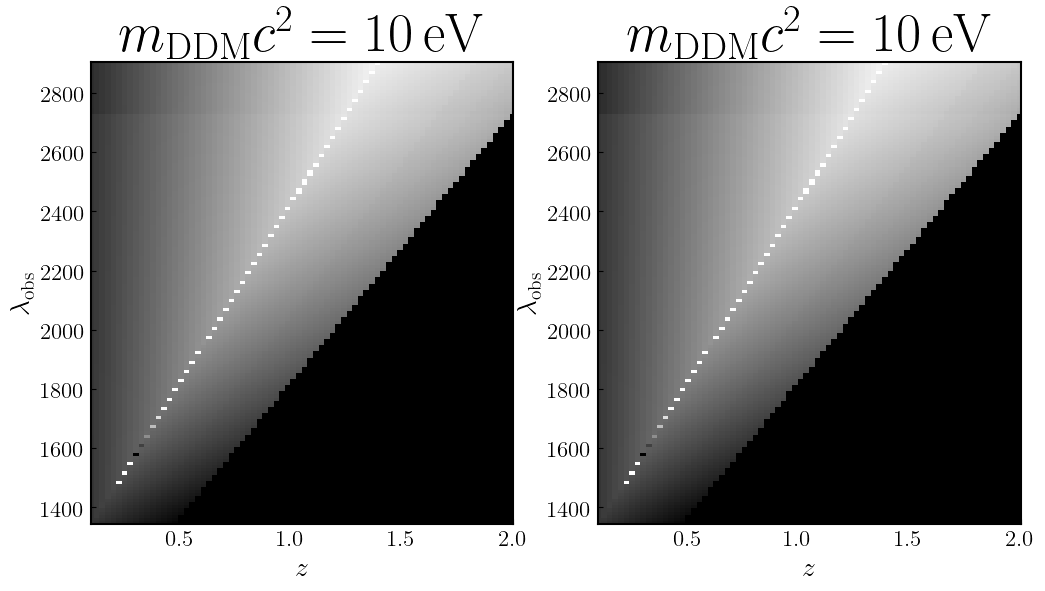

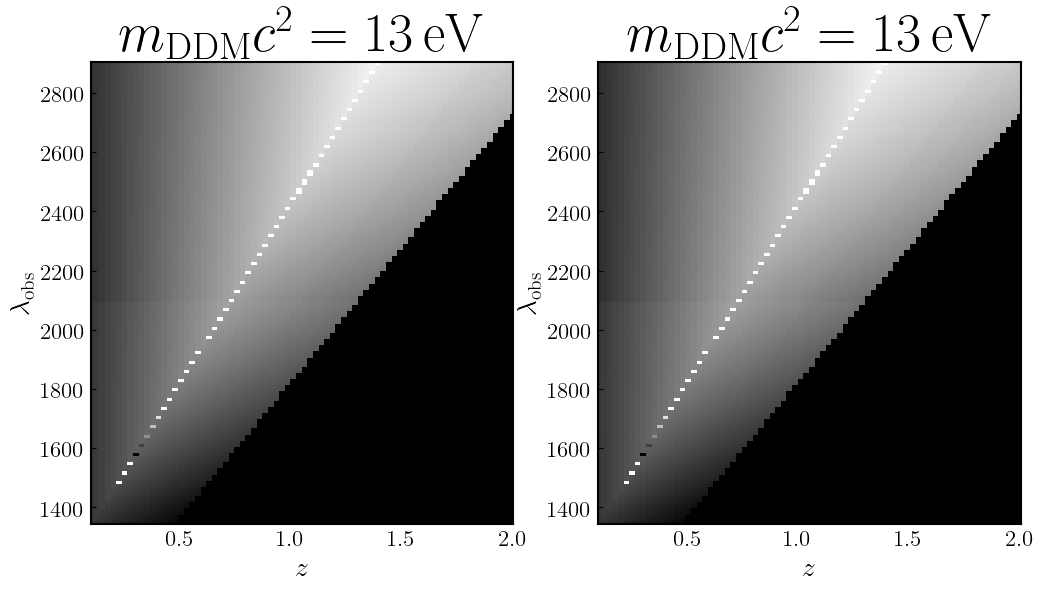

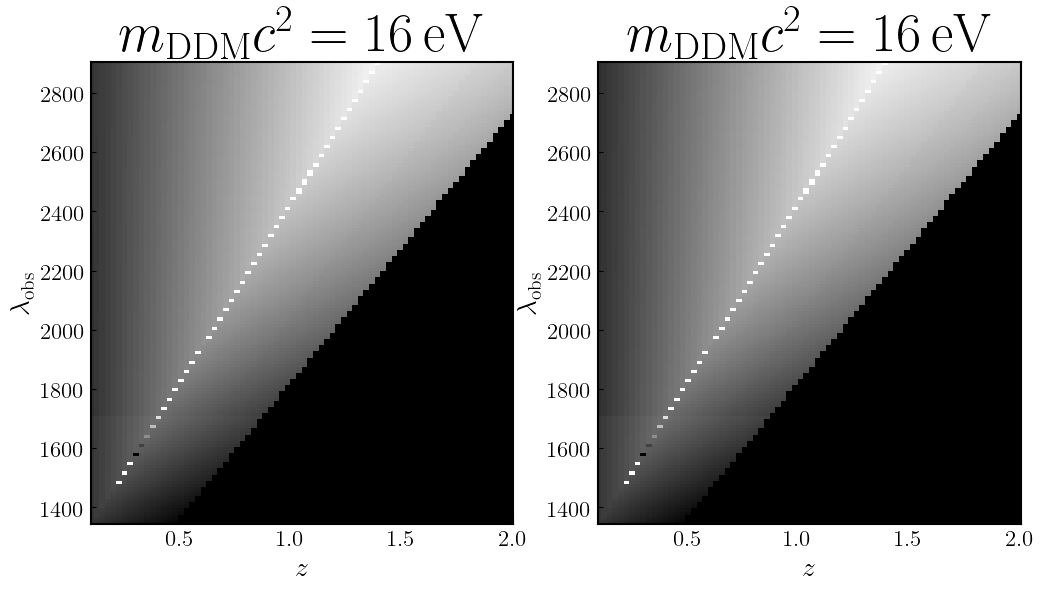

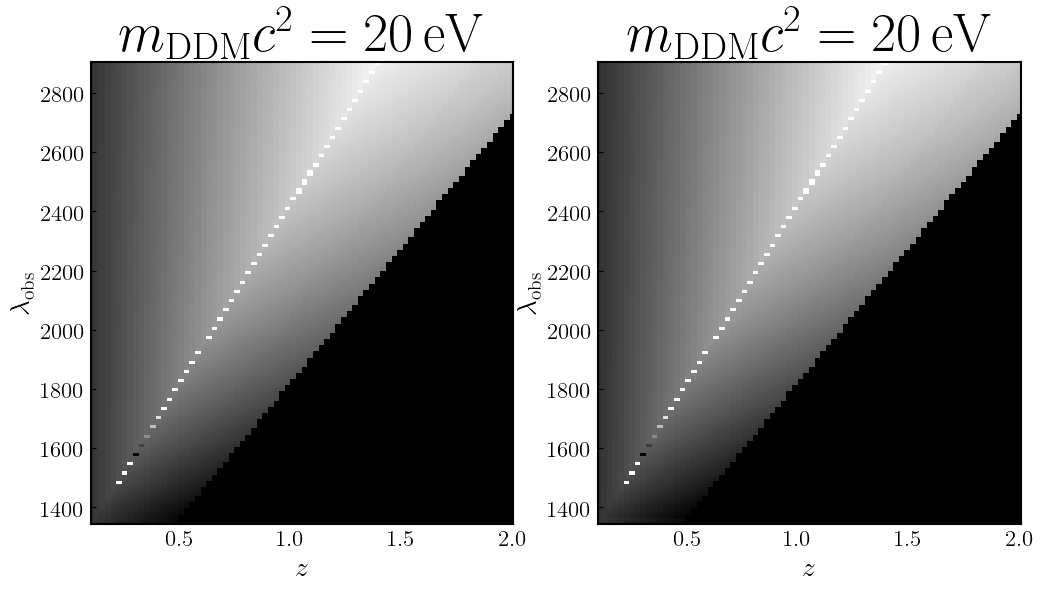

In [132]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.pcolormesh(z_vals, lambda_obs_sigm.value,np.log10(plot_eps_ebl-plot_eps_DM_10).T, cmap='gist_gray',vmin=25.5,vmax=26.5)  
plt.xlim(0.1,2.)
plt.xlabel(r'$z$')
plt.ylabel(r'$\lambda_{\rm obs}$')
plt.title(r'$m_{\rm DDM}c^2 = %g\,{\rm eV}$'%10)

plt.subplot(122)
plt.pcolormesh(z_vals, lambda_obs_sigm.value,np.log10(plot_eps_ebl-plot_eps_DM_JLB_10).T, cmap='gist_gray',vmin=25.5,vmax=26.5)  
plt.xlim(0.1,2.)
plt.xlabel(r'$z$')
plt.ylabel(r'$\lambda_{\rm obs}$')
plt.title(r'$m_{\rm DDM}c^2 = %g\,{\rm eV}$'%10)

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.pcolormesh(z_vals, lambda_obs_sigm.value,np.log10(plot_eps_ebl-plot_eps_DM_13).T, cmap='gist_gray',vmin=25.5,vmax=26.5)  
plt.xlim(0.1,2.)
plt.xlabel(r'$z$')
plt.ylabel(r'$\lambda_{\rm obs}$')
plt.title(r'$m_{\rm DDM}c^2 = %g\,{\rm eV}$'%13)

plt.subplot(122)
plt.pcolormesh(z_vals, lambda_obs_sigm.value,np.log10(plot_eps_ebl-plot_eps_DM_JLB_13).T, cmap='gist_gray',vmin=25.5,vmax=26.5)  
plt.xlim(0.1,2.)
plt.xlabel(r'$z$')
plt.ylabel(r'$\lambda_{\rm obs}$')
plt.title(r'$m_{\rm DDM}c^2 = %g\,{\rm eV}$'%13)

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.pcolormesh(z_vals, lambda_obs_sigm.value,np.log10(plot_eps_ebl-plot_eps_DM_16).T, cmap='gist_gray',vmin=25.5,vmax=26.5)  
plt.xlim(0.1,2.)
plt.xlabel(r'$z$')
plt.ylabel(r'$\lambda_{\rm obs}$')
plt.title(r'$m_{\rm DDM}c^2 = %g\,{\rm eV}$'%16)

plt.subplot(122)
plt.pcolormesh(z_vals, lambda_obs_sigm.value,np.log10(plot_eps_ebl-plot_eps_DM_JLB_16).T, cmap='gist_gray',vmin=25.5,vmax=26.5)  
plt.xlim(0.1,2.)
plt.xlabel(r'$z$')
plt.ylabel(r'$\lambda_{\rm obs}$')
plt.title(r'$m_{\rm DDM}c^2 = %g\,{\rm eV}$'%16)

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.pcolormesh(z_vals, lambda_obs_sigm.value,np.log10(plot_eps_ebl-plot_eps_DM_20).T, cmap='gist_gray',vmin=25.5,vmax=26.5)  
plt.xlim(0.1,2.)
plt.xlabel(r'$z$')
plt.ylabel(r'$\lambda_{\rm obs}$')
plt.title(r'$m_{\rm DDM}c^2 = %g\,{\rm eV}$'%20)

plt.subplot(122)
plt.pcolormesh(z_vals, lambda_obs_sigm.value,np.log10(plot_eps_ebl-plot_eps_DM_JLB_20).T, cmap='gist_gray',vmin=25.5,vmax=26.5)  
plt.xlim(0.1,2.)
plt.xlabel(r'$z$')
plt.ylabel(r'$\lambda_{\rm obs}$')
plt.title(r'$m_{\rm DDM}c^2 = %g\,{\rm eV}$'%20)




In [3]:
nu_DM_rest_funct = lambda m_DM: (m_DM / (4*np.pi*cu.hbar)).to(u.Hz)
nu_DM_obs_funct = lambda m_DM, z: nu_DM_rest_funct(m_DM) / (1+z)

delta_val = 0.005
emissivity_intrinsic = lambda m_DM, z, f_DM_decay_DM: fLyC(z,False) * sigmoid(lambda_from_nu(nu_DM_rest_funct(m_DM))) * (f_gg * (f_DM_decay_DM*u.s**-1) * camb_pars.omegac * rho_crit * cu.c**2 * (1+F_g)/(nu_DM_rest_funct(m_DM))).to(u.erg*u.s**-1*u.Hz**-1*u.Mpc**-3) 

emissivity_obs = lambda m_DM, z, f_DM_decay_DM: emissivity_intrinsic(m_DM,z,f_DM_decay_DM) * np.exp(-tau_Lya(lambda_from_nu(nu_DM_obs_funct(m_DM,z)),z))


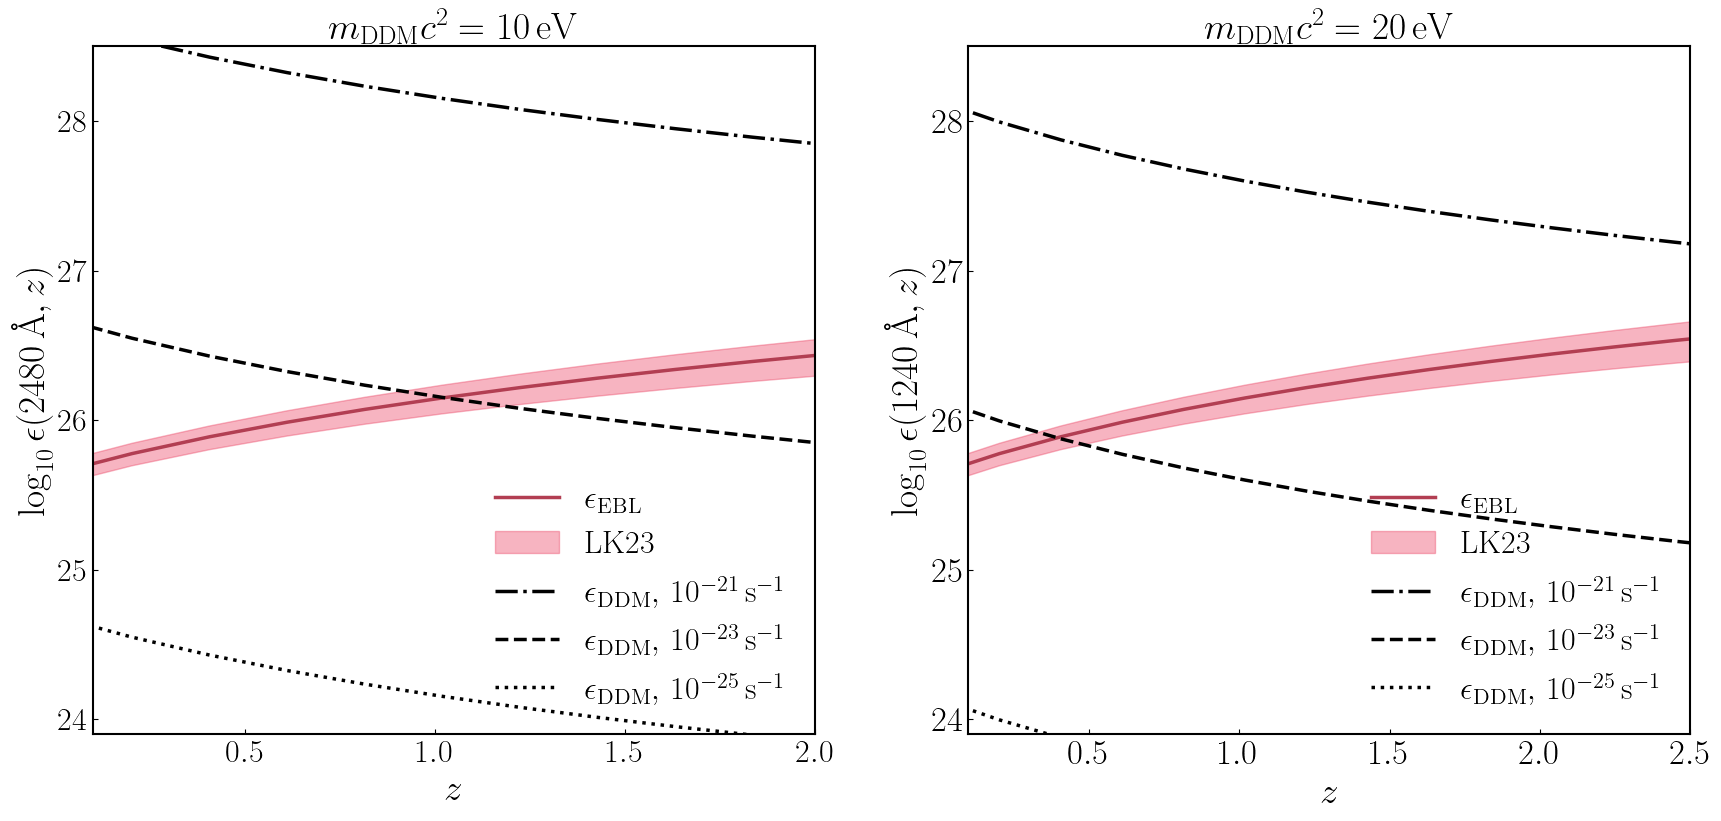

In [9]:
z_vals = np.linspace(0,10)

em_DM = np.zeros(len(z_vals))
em = np.zeros(len(z_vals))
em_DM_20 = np.zeros(len(z_vals))
em_20 = np.zeros(len(z_vals))
em_DM_40 = np.zeros(len(z_vals))
em_40 = np.zeros(len(z_vals))
#tau = np.zeros(len(z_vals))
#tau_20 = np.zeros(len(z_vals))
#tau_40 = np.zeros(len(z_vals))

use_nu_DM_rest = nu_DM_rest_funct(10*u.eV)
use_nu_DM_rest_20 = nu_DM_rest_funct(20*u.eV)
use_nu_DM_rest_40 = nu_DM_rest_funct(40*u.eV)

if use_nu_DM_rest <= nu_from_lambda(1216*u.AA):
    sigmas_nonion = p.plot_err_noninonizing_cont_wb(z_vals, lambda_from_nu(use_nu_DM_rest).value, use_pars_fid = pars_fid,group_vox=True,run=False,galex_detector='DESI',prior='conservative')[0][2]  * (70/67.67)**3
    sigmas_nonion_C18 = p.plot_err_noninonizing_cont_wb(z_vals, lambda_from_nu(use_nu_DM_rest).value, use_pars_fid = p.pars_original_c18_fid,group_vox=True,run=False,galex_detector='SDSS',prior='conservative')[0][0] * (70/67.67)**3 
else:
    print('Check errors!')
    sigmas_nonion = 0.
    sigmas_nonion_C18 = 0.

if use_nu_DM_rest_20 <= nu_from_lambda(1216*u.AA):
    sigmas_nonion_20 = p.plot_err_noninonizing_cont_wb(z_vals, lambda_from_nu(use_nu_DM_rest_20).value, use_pars_fid = pars_fid,group_vox=True,run=False,galex_detector='DESI',prior='conservative')[0][2]  * (70/67.67)**3
    sigmas_nonion_C18_20 = p.plot_err_noninonizing_cont_wb(z_vals, lambda_from_nu(use_nu_DM_rest_20).value, use_pars_fid = p.pars_original_c18_fid,group_vox=True,run=False,galex_detector='SDSS',prior='conservative')[0][0] * (70/67.67)**3 
else:
    print('Check errors!')
    sigmas_nonion_20 = 0.    
    sigmas_nonion_C18_20 = 0.
#
#if use_nu_DM_rest_40 <= nu_from_lambda(1216*u.AA):
#    sigmas_nonion_40 = p.plot_err_noninonizing_cont_wb(z_vals, lambda_from_nu(use_nu_DM_rest_40).value, use_pars_fid = pars_fid,group_vox=True,run=False,galex_detector='DESI',prior='conservative')[0][2]  * (70/67.67)**3
#    sigmas_nonion_C18_40 = p.plot_err_noninonizing_cont_wb(z_vals, lambda_from_nu(use_nu_DM_rest_40).value, use_pars_fid = p.pars_original_c18_fid,group_vox=True,run=False,galex_detector='SDSS',prior='conservative')[0][0]  * (70/67.67)**3
#else:
#    print('Check errors!')
#    sigmas_nonion_40 = 0.
#    sigmas_nonion_C18_40 = 0.
#
#
f_DM_decay_DM_1_vals = [1e-21,1e-23,1e-25]
alphas = ['-.','--',':']
plt.figure(figsize=(18,9))

plt.subplot(121)

plt.xlabel(r'$z$',fontsize=27)
plt.ylabel(r'$\log_{10}\epsilon(%g\,{\rm \AA},z)$'%round(lambda_from_nu(use_nu_DM_rest).value,0),fontsize=27)
plt.title(r'$m_{\rm DDM}c^2=10\,{\rm eV}$',fontsize=27)

plt.subplot(122)

plt.xlabel(r'$z$',fontsize=27)
plt.ylabel(r'$\log_{10}\epsilon(%g\,{\rm \AA},z)$'%round(lambda_from_nu(use_nu_DM_rest_20).value,0),fontsize=27)
plt.title(r'$m_{\rm DDM}c^2=20\,{\rm eV}$',fontsize=27)


for f_DM_decay_DM_1 in f_DM_decay_DM_1_vals: 
    for i in range(len(z_vals)):

        em_DM[i] = emissivity_intrinsic(10*u.eV,z_vals[i],f_DM_decay_DM_1).value
        em[i] = signal(lambda_from_nu(use_nu_DM_rest),z_vals[i],'ULTRASAT',False,False,False,False,False,False).value
        #tau[i] = np.exp(-tau_Lya(lambda_from_nu(nu_DM_obs_funct(10*u.eV,z_vals[i])),z_vals[i]))

        em_DM_20[i] = emissivity_intrinsic(20*u.eV,z_vals[i],f_DM_decay_DM_1).value
        em_20[i] = signal(lambda_from_nu(use_nu_DM_rest_20),z_vals[i],'ULTRASAT',False,False,False,False,False,False).value
        #tau_20[i] = np.exp(-tau_Lya(lambda_from_nu(nu_DM_obs_funct(20*u.eV,z_vals[i])),z_vals[i]))

        em_DM_40[i] = emissivity_intrinsic(40*u.eV,z_vals[i],f_DM_decay_DM_1).value
        em_40[i] = signal(lambda_from_nu(use_nu_DM_rest_40),z_vals[i],'ULTRASAT',False,False,False,False,False,False).value
        #tau_40[i] = np.exp(-tau_Lya(lambda_from_nu(nu_DM_obs_funct(25*u.eV,z_vals[i])),z_vals[i]))

    idx = f_DM_decay_DM_1_vals.index(f_DM_decay_DM_1)
    plt.subplot(121)
    if f_DM_decay_DM_1 == 1e-21:
        plt.plot(z_vals,np.log10(em),label=r'$\epsilon_{\rm EBL}$')#,label=r'$\rm UV-EBL$')
        #plt.plot(z_vals,np.log10(em+em_DM),'k',label=r'$\rm Total\, (10^{%g}\,{\rm s^{-1}})$'%np.log10(f_DM_decay_DM_1))

        plt.fill_between(z_vals, np.log10(np.maximum(1e20,em - sigmas_nonion)), np.log10(em + sigmas_nonion), color=color_ULTRASAT, alpha = 0.4, label=r'$\rm LK23$')

        #plt.plot(z_vals, np.log10(np.maximum(1e20,em - sigmas_nonion_C18)),color_FUV,alpha=0.6,linestyle=(0,(5,1)),linewidth=1.8)

        #plt.plot(z_vals, np.log10(em + sigmas_nonion_C18),color_FUV,alpha=0.6,linestyle=(0,(5,1)),linewidth=1.8)

    plt.plot(z_vals,np.log10(em_DM),'k',linestyle = alphas[idx],label=r'$\epsilon_{\rm DDM},\, 10^{%g}\,{\rm s^{-1}}$'%np.log10(f_DM_decay_DM_1))

    plt.legend(loc=4)

    plt.ylim(23.9,28.5)
    plt.xlim(zmin_gal,zmax_gal)

    plt.subplot(122)
    if f_DM_decay_DM_1 == 1e-21:
        plt.plot(z_vals,np.log10(em),label=r'$\epsilon_{\rm EBL}$')#,label=r'$\rm UV-EBL$')

        #plt.plot(z_vals,np.log10(em_20+em_DM_20),'k',label=r'$\rm Total\, (10^{%g}\,{\rm s^{-1}})$'%np.log10(f_DM_decay_DM_1))

        plt.fill_between(z_vals, np.log10(np.maximum(1e20,em - sigmas_nonion)), np.log10(em + sigmas_nonion), color=color_ULTRASAT, alpha = 0.4,label=r'$\rm LK23$')

        #plt.plot(z_vals, np.log10(np.maximum(1e20,em - sigmas_nonion_C18)),color_FUV,alpha=0.6,linestyle=(0,(5,1)),linewidth=1.8)

        #plt.plot(z_vals, np.log10(em + sigmas_nonion_C18),color_FUV,alpha=0.6,linestyle=(0,(5,1)),linewidth=1.8)

    plt.plot(z_vals,np.log10(em_DM_20),'k',linestyle = alphas[idx],label=r'$\epsilon_{\rm DDM},\, 10^{%g}\,{\rm s^{-1}}$'%np.log10(f_DM_decay_DM_1))

    plt.legend(loc=4)

    plt.ylim(23.9,28.5)
    plt.xlim(zmin_gal,2.5)


plt.subplot(121)
plt.tick_params(axis='x', labelsize=23) 
plt.tick_params(axis='y', labelsize=23) 
plt.subplots_adjust(wspace=0)

plt.subplot(122)
plt.tick_params(axis='x', labelsize=25) 
plt.tick_params(axis='y', labelsize=25) 
plt.subplots_adjust(wspace=0)

plt.tight_layout()

plt.savefig(use_results_dir + 'PLOTS/EBL_DM/DM_emissivity.png',bbox_inches='tight')

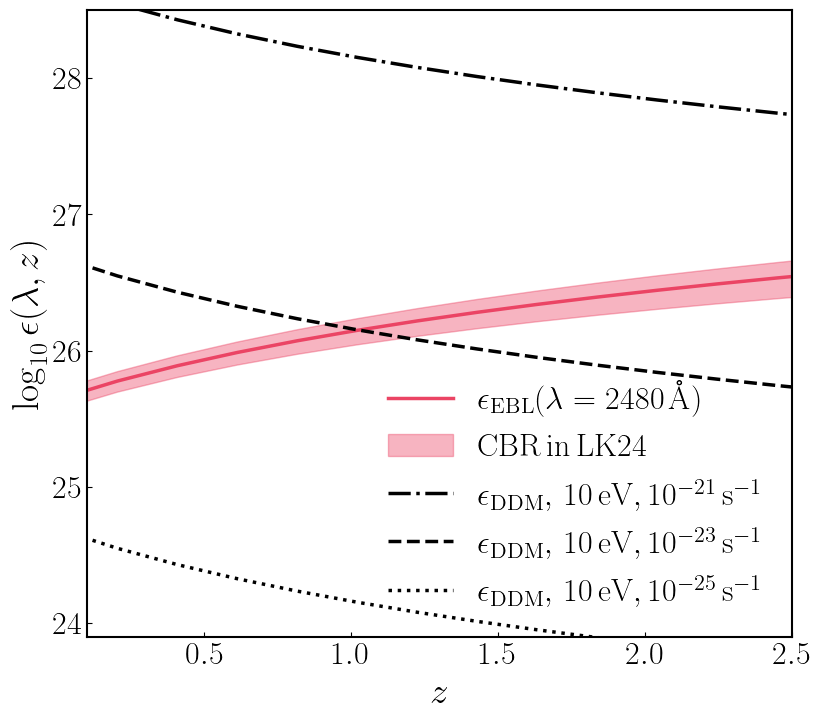

In [14]:
plt.figure(figsize=(9,8))

plt.xlabel(r'$z$',fontsize=27)
plt.ylabel(r'$\log_{10}\epsilon(\lambda,z)$',fontsize=27)


colors = ['k','b']
colors_ebl = [color_ULTRASAT,'purple']

m_val = [10]#,20]

for m in m_val:
    use_nu = use_nu_DM_rest if m_val.index(m) == 0 else use_nu_DM_rest_20

    for f_DM_decay_DM_1 in f_DM_decay_DM_1_vals: 

        color = colors[m_val.index(m)]
        color_ebl = colors_ebl[m_val.index(m)]
        if f_DM_decay_DM_1 == 1e-21:
            plt.plot(z_vals,np.log10(em),color = color_ebl, label=r'$\epsilon_{\rm EBL}(\lambda = %g\,{\rm \AA})$'%round(lambda_from_nu(use_nu).value,0))#,label=r'$\rm UV-EBL$')

            plt.fill_between(z_vals, np.log10(np.maximum(1e20,em - sigmas_nonion)), np.log10(em + sigmas_nonion), color=color_ebl, alpha = 0.4,label=r'$\rm CBR\,in\,LK24$')

        for i in range(len(z_vals)):

            em_DM[i] = emissivity_intrinsic(m*u.eV,z_vals[i],f_DM_decay_DM_1).value
            em[i] = signal(lambda_from_nu(use_nu),z_vals[i],'ULTRASAT',False,False,False,False,False,False).value
            #tau[i] = np.exp(-tau_Lya(lambda_from_nu(nu_DM_obs_funct(10*u.eV,z_vals[i])),z_vals[i]))

        idx = f_DM_decay_DM_1_vals.index(f_DM_decay_DM_1)

        val = 10 if m_val.index(m) == 0 else 20
        plt.plot(z_vals,np.log10(em_DM),color=color,linestyle = alphas[idx],label=r'$\epsilon_{\rm DDM},\, %g\,{\rm eV},$'%val + r'$\, 10^{%g}\,{\rm s^{-1}}$'%np.log10(f_DM_decay_DM_1))

        plt.legend(loc=4)

        plt.ylim(23.9,28.5)
        plt.xlim(zmin_gal,zmax_gal)


plt.legend(loc=4)

plt.ylim(23.9,28.5)
plt.xlim(zmin_gal,2.5)


plt.tick_params(axis='x', labelsize=23) 
plt.tick_params(axis='y', labelsize=23) 
plt.subplots_adjust(wspace=0)

plt.tight_layout()

plt.savefig(use_results_dir + 'PLOTS/EBL_DM/DM_emissivity.png',bbox_inches='tight')

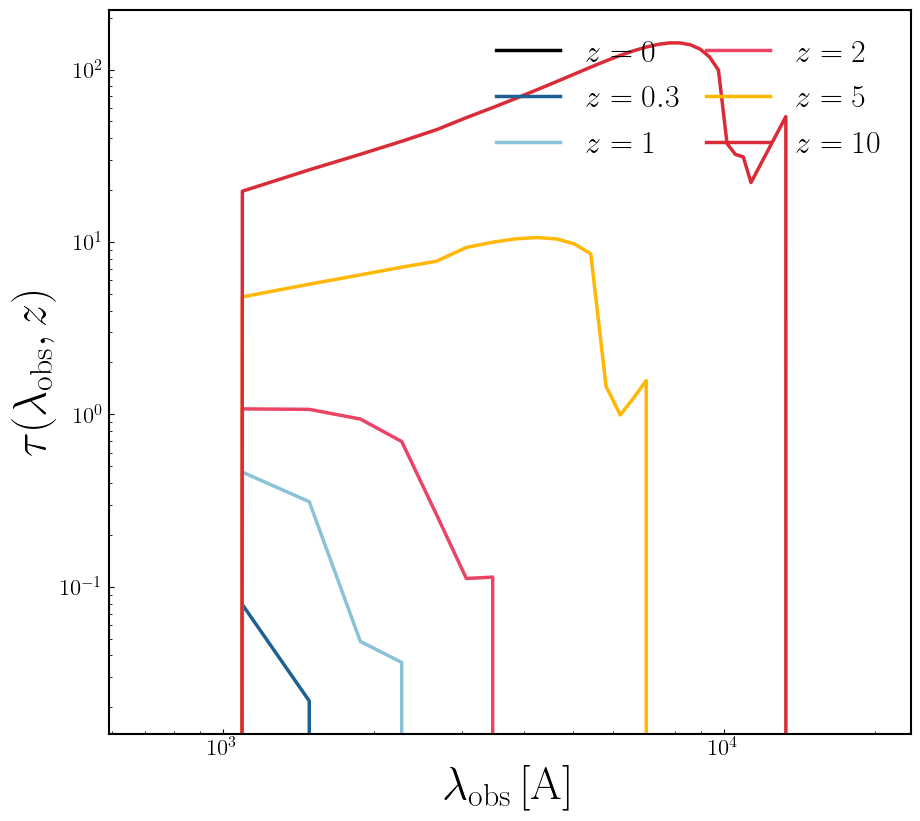

In [88]:
plot_tau()

In [100]:
m_DM_vals = np.linspace(10,50,100)*u.eV
z_vals = np.linspace(0,2,10)

nu_DM_obs_vals = np.zeros((len(z_vals),len(m_DM_vals)))
DM_intr_em_vals = np.zeros((len(z_vals),len(m_DM_vals)))
DM_obs_em_vals = np.zeros((len(z_vals),len(m_DM_vals)))
for i in range(len(z_vals)):
    for j in range(len(m_DM_vals)):
        nu_DM_obs_vals[i,j] = nu_DM_obs_funct(m_DM_vals[j],z_vals[i]).value
        DM_intr_em_vals[i,j] = emissivity_intrinsic(m_DM_vals[j],z_vals[i],1e-23).value
        DM_obs_em_vals[i,j] = emissivity_obs(m_DM_vals[j],z_vals[i],1e-23).value


Text(0, 0.5, '$m_{\\rm DM}c^2$')

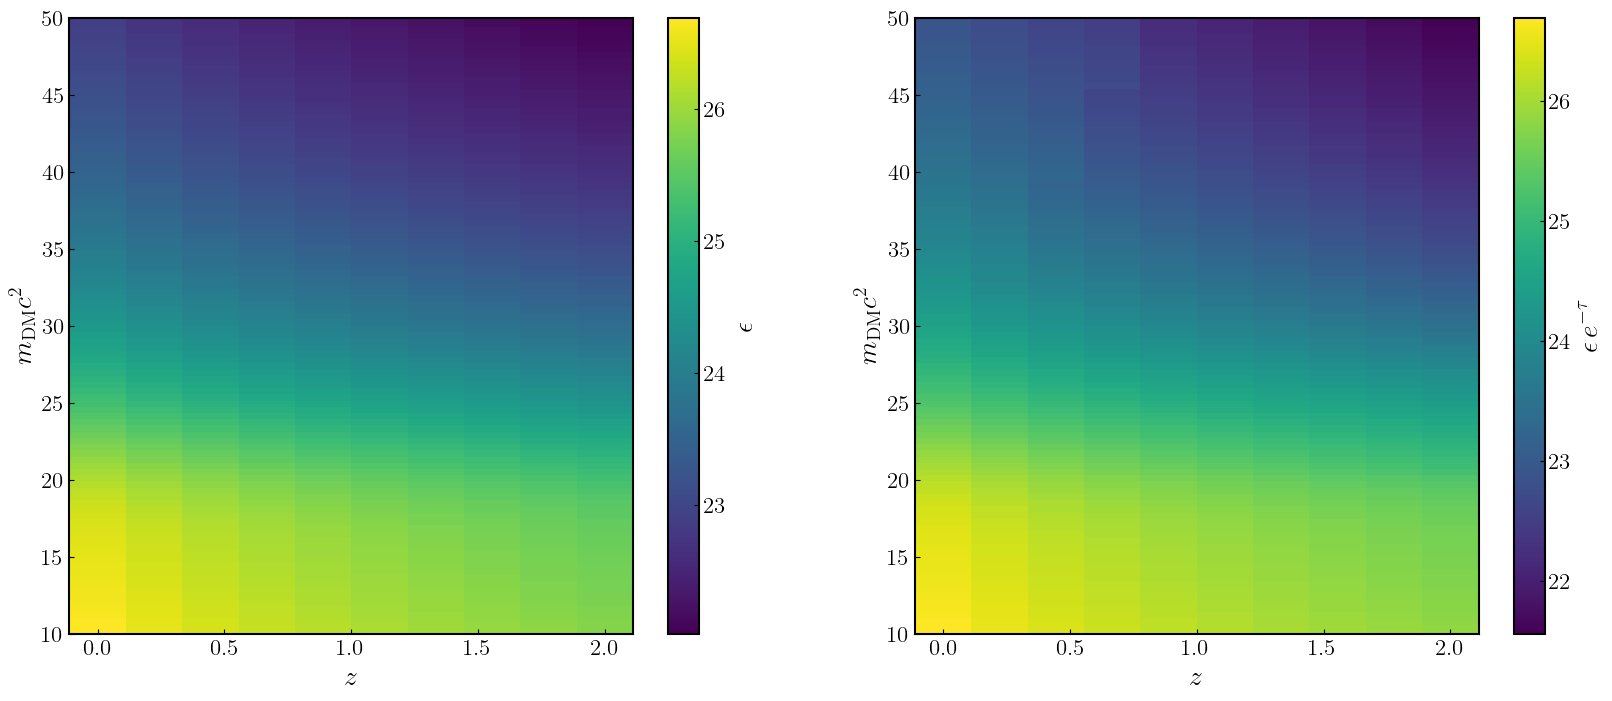

In [102]:

plt.figure(figsize=(20,8))
plt.subplot(121)

plt.pcolormesh(z_vals, (m_DM_vals.value),np.log10(DM_intr_em_vals).T)  

plt.ylim((m_DM_vals.value)[0],(m_DM_vals.value)[-1])

plt.colorbar(label=r'$\epsilon$')
plt.xlabel(r'$z$')
plt.ylabel(r'$m_{\rm DM}c^2$')

plt.subplot(122)

plt.pcolormesh(z_vals, (m_DM_vals.value),np.log10(DM_obs_em_vals).T)  

plt.ylim((m_DM_vals.value)[0],(m_DM_vals.value)[-1])

plt.colorbar(label=r'$\epsilon\,e^{-\tau}$')
plt.xlabel(r'$z$')
plt.ylabel(r'$m_{\rm DM}c^2$')

Text(0, 0.5, '$\\epsilon$')

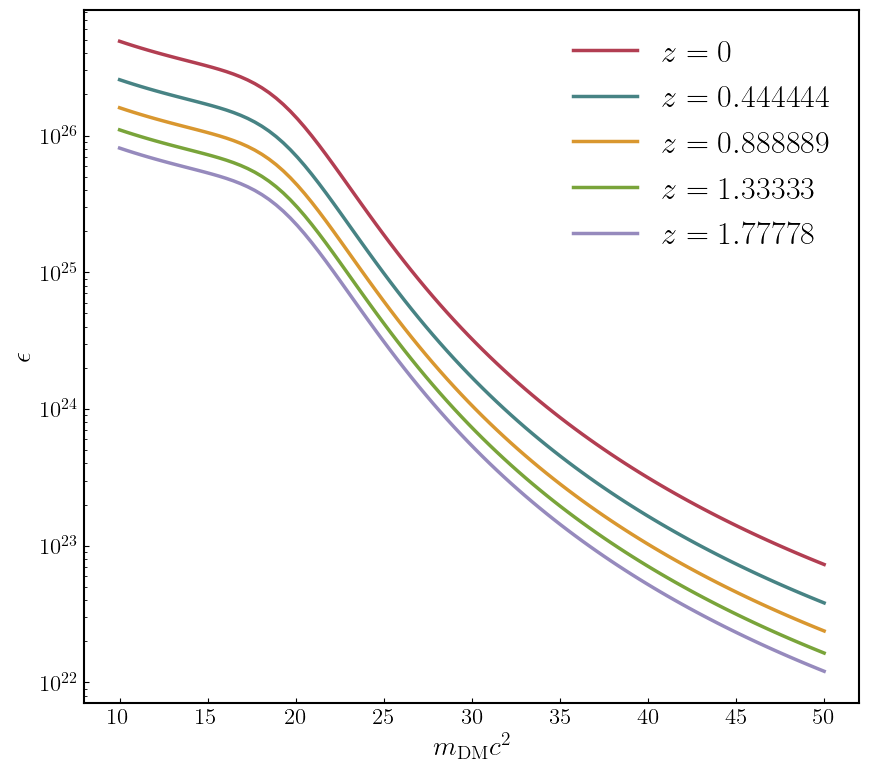

In [103]:
for i in ([0,2,4,6,8]):
    plt.semilogy(m_DM_vals,DM_intr_em_vals[i,:],label=r'$z=%g$'%z_vals[i])

plt.xlabel(r'$m_{\rm DM}c^2$')
plt.legend()
plt.ylabel(r'$\epsilon$')

Text(0, 0.5, '$\\lambda_{\\rm obs}$')

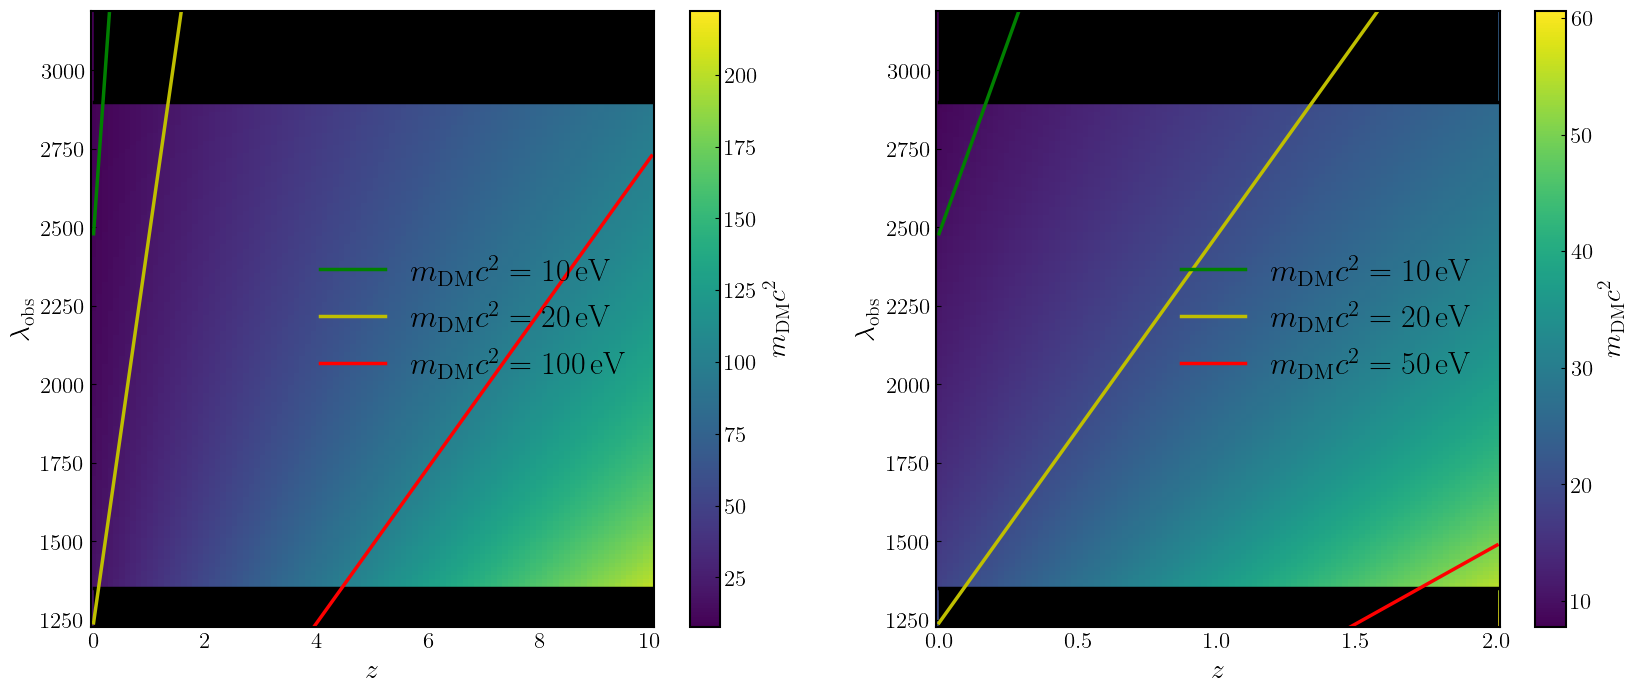

In [104]:
lambda_obs_max = lambda_from_nu(nu_min_US)
lambda_obs_min = lambda_from_nu(nu_max_gFUV)

nnu = 150
nz = 100

lambda_DM_obs = np.linspace(lambda_obs_min/1.1,lambda_obs_max*1.1,nnu)
z_vals = np.linspace(0,10,nz)

z_vals_matr = z_vals[:,np.newaxis]*np.ones((nz,nnu))
lambda_DM_obs_matr = lambda_DM_obs[np.newaxis,:]*np.ones((nz,nnu))

mc2_DM = ((4*np.pi*cu.hbar) * (nu_from_lambda(lambda_DM_obs_matr)*(1+z_vals_matr))).to(u.eV)

plt.figure(figsize=(20,8))
plt.subplot(121)
plt.pcolormesh(z_vals, (lambda_DM_obs.value),(mc2_DM.value).T)  

plt.plot(z_vals,(lambda_obs_min.value)*np.ones(len(z_vals)),'k')
plt.plot(z_vals,(lambda_obs_max.value)*np.ones(len(z_vals)),'k')

lambda_obs_10eV = lambda_from_nu((10*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))
lambda_obs_20eV = lambda_from_nu((20*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))
lambda_obs_100eV =lambda_from_nu( (100*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))

plt.plot(z_vals,(lambda_obs_10eV.value),'g',label=r'$m_{\rm DM}c^2 = 10\,{\rm eV}$')
plt.plot(z_vals,(lambda_obs_20eV.value),'y',label=r'$m_{\rm DM}c^2 = 20\,{\rm eV}$')
plt.plot(z_vals,(lambda_obs_100eV.value),'r',label=r'$m_{\rm DM}c^2 = 100\,{\rm eV}$')

plt.ylim((lambda_DM_obs.value)[0],(lambda_DM_obs.value)[-1])

plt.legend(loc=7)

plt.fill_between(z_vals,(lambda_obs_max.value),y2=(lambda_obs_max.value*1.1),color='k')
plt.fill_between(z_vals,(lambda_obs_min.value/1.1),y2=(lambda_obs_min.value),color='k')

plt.colorbar(label=r'$m_{\rm DM}c^2$')
plt.xlabel(r'$z$')
plt.ylabel(r'$\lambda_{\rm obs}$')

plt.subplot(122)

lambda_DM_obs = np.linspace(lambda_obs_min/1.1,lambda_obs_max*1.1,nnu)
z_vals = np.linspace(0,2.,nz)

lambda_obs_10eV = lambda_from_nu((10*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))
lambda_obs_20eV = lambda_from_nu((20*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))
lambda_obs_50eV = lambda_from_nu((50*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))

z_vals_matr = z_vals[:,np.newaxis]*np.ones((nz,nnu))
lambda_DM_obs_matr = lambda_DM_obs[np.newaxis,:]*np.ones((nz,nnu))

mc2_DM = ((4*np.pi*cu.hbar) * (nu_from_lambda(lambda_DM_obs_matr)*(1+z_vals_matr))).to(u.eV)

plt.pcolormesh(z_vals, (lambda_DM_obs.value),(mc2_DM.value).T)  

plt.plot(z_vals,(lambda_obs_min.value)*np.ones(len(z_vals)),'k')
plt.plot(z_vals,(lambda_obs_max.value)*np.ones(len(z_vals)),'k')

lambda_obs_20eV = lambda_from_nu((20*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))
lambda_obs_100eV =lambda_from_nu( (100*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))
lambda_obs_10eV = lambda_from_nu((10*u.eV / (4*np.pi*cu.hbar)).to(u.Hz) / (1+z_vals))

plt.plot(z_vals,(lambda_obs_10eV.value),'g',label=r'$m_{\rm DM}c^2 = 10\,{\rm eV}$')
plt.plot(z_vals,(lambda_obs_20eV.value),'y',label=r'$m_{\rm DM}c^2 = 20\,{\rm eV}$')
plt.plot(z_vals,(lambda_obs_50eV.value),'r',label=r'$m_{\rm DM}c^2 = 50\,{\rm eV}$')

plt.ylim((lambda_DM_obs.value)[0],(lambda_DM_obs.value)[-1])

plt.legend(loc=7)

plt.fill_between(z_vals,(lambda_obs_max.value),y2=(lambda_obs_max.value*1.1),color='k')
plt.fill_between(z_vals,(lambda_obs_min.value/1.1),y2=(lambda_obs_min.value),color='k')

plt.colorbar(label=r'$m_{\rm DM}c^2$')
plt.xlabel(r'$z$')
plt.ylabel(r'$\lambda_{\rm obs}$')

In [1]:
import EBL_DMdecay as dm
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '/mnt/DATA/coding/lim_b7/AxionLimits/')
from PlotFuncs import FigSetup, AxionPhoton

from scipy.interpolate import interp1d
import astropy.units as u
import astropy.constants as cu

Note: redshifts have been re-sorted (earliest first)


results/EBL_DM_large/DM_9.5,-27.0/
results/EBL_DM_large/DM_9.5,-27.0/
results/EBL_DM_large/DM_9.5,-27.0/
DETECTOR: GALEX_ULTRASAT_DESIDESI
--- $\epsilon_{1500}^{z=0}$: 4.215509008098908e+25 +- 6.586765385664677e+24
--- $\gamma_{1500}$: 2.06 +- 0.211908
--- $\alpha_{1500}^{z=0}$: -0.08 +- 1.21186
--- $C_{\alpha_{1500}}$: 1.85 +- 0.004005
--- $\alpha_{1100}^{z=0}$: -3.71 +- 1.217421
--- $C_{\alpha_{1100}}$: 0.5 +- 0.17761
--- $EW^{z=0.3}$: -6.17 +- 0.217308
--- $EW^{z=1}$: 88.02 +- 0.243307
--- $\log_{10}f_{\rm LyC}^{z=1}$: -0.53 +- 0.072737
--- $\log_{10}f_{\rm LyC}^{z=2}$: -0.84 +- 0.078443
--- $b_{1500}^{z=0}$: 0.32 +- 0.05
--- $\gamma_{b_v}$: -0.86 +- 1.215107
--- $\gamma_{b_z}$: 0.79 +- 0.212337
--- $\alpha_{900}$: -1.5 +- 2.472041
--- $f_{\rm DM}\Gamma$: -27.0 +- 27.276282
results/EBL_DM_large/DM_10.0,-27.0/
results/EBL_DM_large/DM_10.0,-27.0/
results/EBL_DM_large/DM_10.0,-27.0/
DETECTOR: GALEX_ULTRASAT_DESIDESI
--- $\epsilon_{1500}^{z=0}$: 4.215509008098908e+25 +- 6.58676810042274

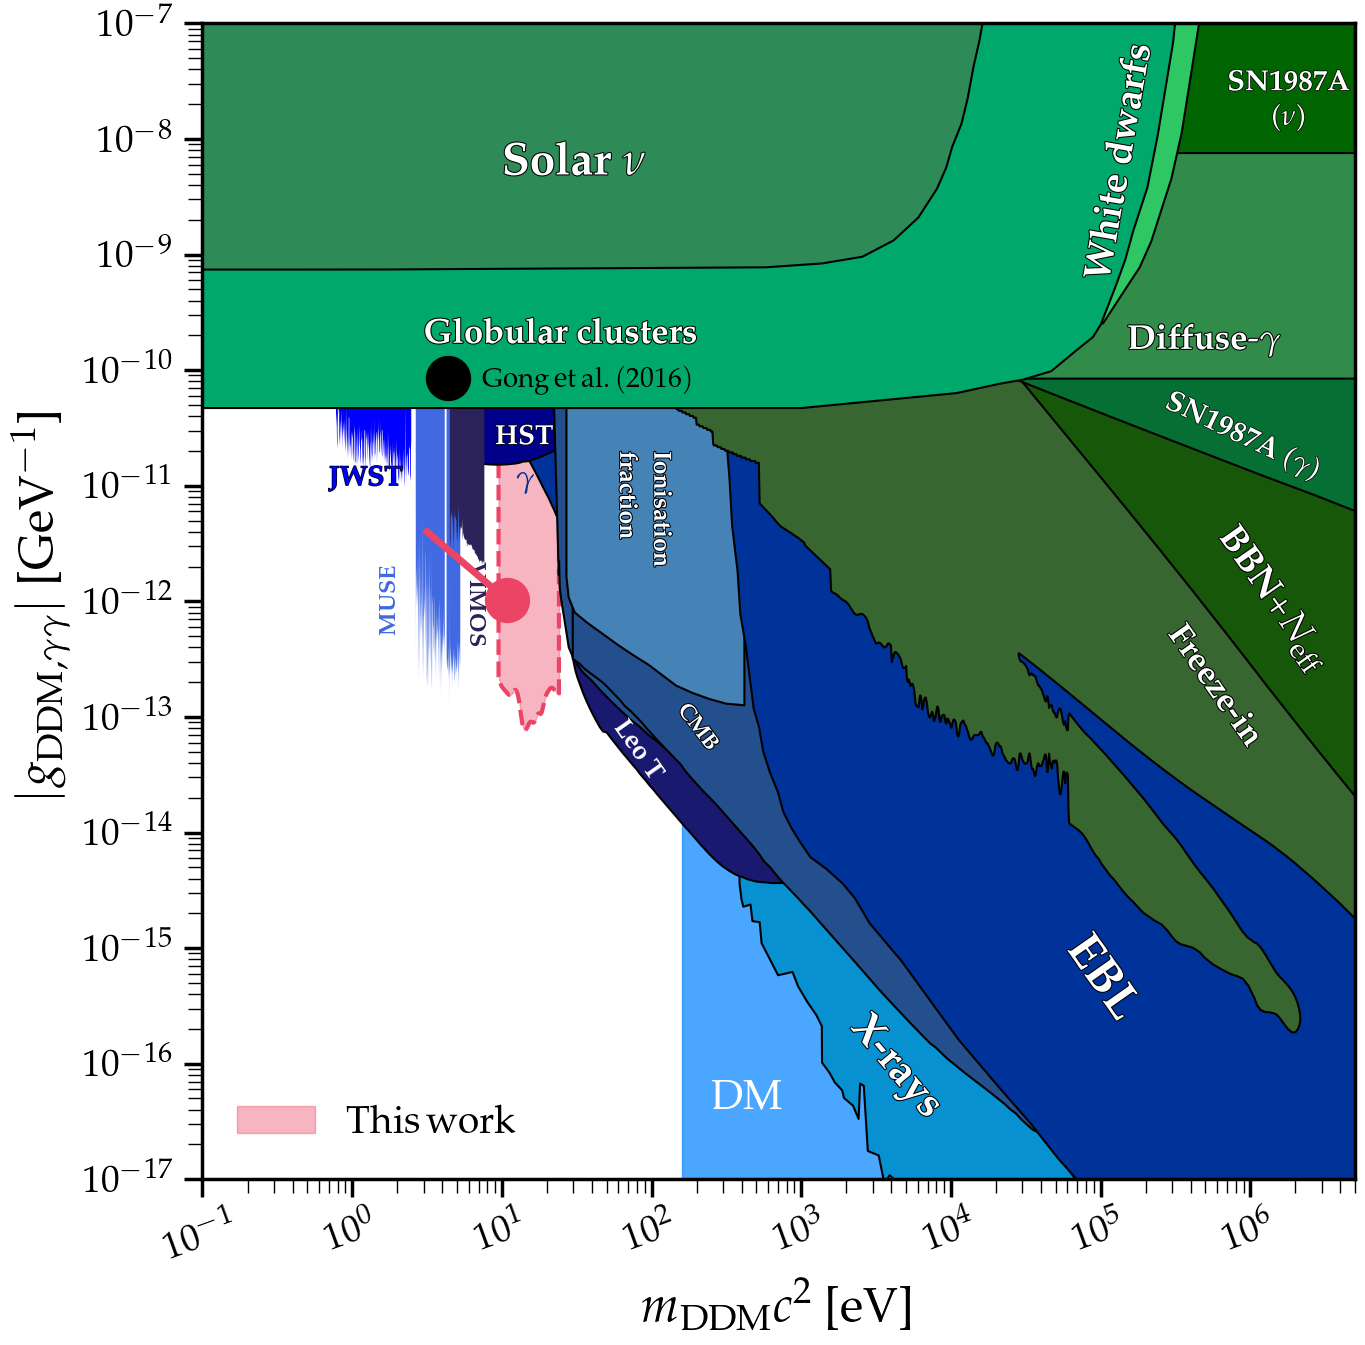

In [28]:
fig,ax = FigSetup(Shape='Square',xlab=r'$m_{\rm DDM}c^2$ [eV]',ylab=r'$|g_{{\rm DDM},\gamma\gamma}|$ [GeV$^{-1}$]',mathpazo=True, g_min = 1.0e-17,g_max = 1.0e-7, m_min = 1.0e-1,m_max = 5.0e6,figsize=(5,5),lfs=35)

AxionPhoton.Cosmology(ax)
#AxionPhoton.StellarBounds(ax)

AxionPhoton.GlobularClusters(ax,)
AxionPhoton.SolarNu(ax,)
AxionPhoton.WhiteDwarfs(ax,fs=28,text_pos=[1e5,6e-10],rotation=80)

#AxionPhoton.SolarBasin(ax,col='gray',fs=27)

#AxionPhoton.StAB(ax,col='gray',fs=21,text_pos=[0.7e4,0.06e-9])
#AxionPhoton.Helioscopes(ax,col='gray')
#AxionPhoton.LSW(ax)
AxionPhoton.ALPS(ax,)

text_on=True
AxionPhoton.DiffuseGammaRays(ax,text_on=text_on,fs=25)
AxionPhoton.SN1987A_decay(ax,text_on=text_on,fs=21)
AxionPhoton.SN1987A_HeavyALP_nu(ax,text_on=text_on,fs=21)
AxionPhoton.MUSE(ax,text_on=text_on,fs=17)
AxionPhoton.JWST(ax,text_on=text_on,fs=20,text_pos=[0.7,1.5e-11],text_col='b')
AxionPhoton.VIMOS(ax,text_on=text_on,fs=17)
AxionPhoton.HST(ax,text_on=text_on,fs=20)
AxionPhoton.GammaRayAttenuation(ax,text_on=text_on,fs=22)
AxionPhoton.XMMNewton(ax,text_on=text_on)
AxionPhoton.INTEGRAL(ax,text_on=text_on)
AxionPhoton.NuSTAR(ax,text_on=text_on)
AxionPhoton.LeoT(ax,text_on=text_on,fs=19,text_col='w',text_pos=[0.7e2,0.1e-12])

AxionPhoton.PVLAS(ax,)
AxionPhoton.OSQAR(ax,)
AxionPhoton.CROWS(ax,)

# AxionPhoton.ALPdecay(ax)

#AxionPhoton.QCDAxion(ax)


m_DM_range_small_begin = asarray([9.5,10., 11., 12.,13.,14.,15., 16., 17.,18.,19.])

alpha_fid = dm.alpha_fid
m0_fid = dm.m0_fid
with_run = False

f_DM_decay_small, m_DM_range_small = dm.compare_results_DDM(m_DM_range_small_begin, plot_flag=False,alpha_DDM=False,m_0_DDM=False,with_run = with_run, including_ours=False)  

f_DM_decay_small_ours, m_DM_range_small_ours = dm.compare_results_DDM(list(m_DM_range_small_begin) , plot_flag=False,alpha_DDM=False,m_0_DDM=False,with_run = with_run, including_ours=True)  


# THE OTHER PLOT IS 2SIGMA
f_DM_decay_small = dm.np.asarray(f_DM_decay_small)/2
f_DM_decay_small_ours = dm.np.asarray(f_DM_decay_small_ours)/2

window_size = 7  # Adjust this value based on your preference

this_work = interp1d(m_DM_range_small,f_DM_decay_small)
m_DM_range = linspace(m_DM_range_small[0],m_DM_range_small[-1],100)
f_DM_decay = dm.moving_average(this_work(m_DM_range), window_size) * u.s**-1

this_work_ours = interp1d(m_DM_range_small_ours,f_DM_decay_small_ours)
m_DM_range_ours = linspace(m_DM_range_small_ours[0],m_DM_range_small_ours[-1],100)
f_DM_decay_ours = dm.moving_average(this_work_ours(m_DM_range_ours), window_size) * u.s**-1

m_DM_range *= u.eV
m_DM_range_ours *= u.eV

lines = ['-']
f_DDM = [1.]
mark = ['o']
for i in f_DDM:
    tau_inverse = f_DM_decay / dm.f_gg / i
    tau_inverse_ours = f_DM_decay_ours / dm.f_gg / i

    g = ((64*pi * cu.hbar.to(u.eV*u.s) / m_DM_range[:len(f_DM_decay)]**3 * tau_inverse )**(1/2.)).to(u.GeV**-1)
    g_ours = ((64*pi * cu.hbar.to(u.eV*u.s) / m_DM_range_ours[:len(f_DM_decay_ours)]**3 * tau_inverse_ours )**(1/2.)).to(u.GeV**-1)

    #plt.fill_between((m_DM_range.value[:len(g)]),(g.value),10**-6,color=dm.color_ULTRASAT,alpha=0.5,zorder=0, label=r'$\rm This\, work,\,no\,escape$')
    plt.fill_between((m_DM_range_ours.value[:len(g_ours)]),(g_ours.value),10**-6,facecolor=dm.color_ULTRASAT,edgecolor=dm.color_ULTRASAT,zorder=0, alpha=0.4,label=r'$\rm This\, work$')
    plt.fill_between((m_DM_range_ours.value[:len(g_ours)]),(g_ours.value),10**-6,linestyle = '--',linewidth=3 ,facecolor='none',edgecolor=dm.color_ULTRASAT,zorder=0, )


plt.fill_between([10**2.2,10**2.2,10000,10000,10**2.2],[1e-17,1e-13,1e-13,1e-17,1e-17],color='dodgerblue',zorder=0,alpha=0.8)

plt.text(250,4e-17,r'$\rm DM$',color='w',fontsize=30)

plt.scatter(10**0.6394557823129259, 10**-10.070400000000001,marker='o',s=1000,color='k',zorder=10)
plt.text(10**0.87, 10**-10.15,r'$\rm Gong\,et\,al.\,(2016)$',color='k',fontsize=20)

#plt.scatter(10**0.6802721088435377, 10**-10.8512,marker='*',s=1000,color='r',zorder=10)
#plt.text(10**-1.14, 10**-11,r'$\rm Gong\,et\,al.\,(2016)$',color='k',fontsize=20)



#x_scatter = np.trapz(m_DM_range_ours*dm.ddm_mass_probability_density(m_DM_range_ours,1.66,3.21),m_DM_range_ours)
x_scatter_fid = dm.np.trapz(m_DM_range_ours.value*dm.ddm_mass_probability_density(m_DM_range_ours.value,dm.alpha_fid,dm.m0_fid),m_DM_range_ours.value)/dm.np.trapz(dm.ddm_mass_probability_density(m_DM_range_ours.value,dm.alpha_fid,dm.m0_fid),m_DM_range_ours.value)


f_DM_decay_spectrum = dm.compare_results_DDM(False, plot_flag=False,alpha_DDM=dm.alpha_fid,m_0_DDM=dm.m0_fid,with_run = False, including_ours=True)[0]

tau_inverse_spectrum = f_DM_decay_spectrum / dm.f_gg / 1

g_spectrum = ((64*pi * cu.hbar.to(u.eV*u.s) / (x_scatter_fid*u.eV)**3 * (tau_inverse_spectrum*u.s**-1) )**(1/2.)).to(u.GeV**-1)
g_spectrum_1 = ((64*pi * cu.hbar.to(u.eV*u.s) / (10**0.6394557823129259*u.eV)**3 * (tau_inverse_spectrum*u.s**-1) )**(1/2.)).to(u.GeV**-1)


plt.scatter(x_scatter_fid, g_spectrum,marker='o',s=1000,
edgecolor=dm.color_ULTRASAT,facecolor=dm.color_ULTRASAT,zorder=0,)

#plt.scatter(10**0.6394557823129259, g_spectrum_1,marker='o',s=1000,edgecolor=dm.color_ULTRASAT,facecolor=dm.color_ULTRASAT,zorder=100,alpha=0.3)

#
plt.plot([10**0.5,x_scatter_fid], [g_spectrum_1.value,g_spectrum.value],color=dm.color_ULTRASAT,zorder=100,linewidth=5,linestyle='-')


plt.tick_params(axis='y', labelsize=27) 
plt.tick_params(axis='x', labelsize=27) 

plt.legend(ncol=1,loc=3,fontsize=28)

plt.tight_layout()
plt.savefig(use_results_dir + 'PLOTS/EBL_DM/ALP_constraints.png',bbox_inches='tight')


In [10]:
temp = dm.compare_results_DDM(False, plot_flag=False,alpha_DDM=dm.alpha_fid,m_0_DDM=dm.m0_fid,with_run = False, including_ours=True,)
f_DM_decay_spectrum = temp[0]

print('\n')
print('log tau_inv = ' + str(dm.np.log10(f_DM_decay_spectrum)))

tau_inverse_spectrum = f_DM_decay_spectrum / dm.f_gg / 1

#g_spectrum = ((64*pi * cu.hbar.to(u.eV*u.s) / (x_scatter_fid*u.eV)**3 * (tau_inverse_spectrum*u.s**-1) )**(1/2.)).to(u.GeV**-1)
g_spectrum = ((64*pi * cu.hbar.to(u.eV*u.s) / (10**0.6394557823129259*u.eV)**3 * (tau_inverse_spectrum*u.s**-1) )**(1/2.)).to(u.GeV**-1)

print('log g = ' + str(dm.np.log10(g_spectrum.value)))


results/EBL_DM_large/DM_False,-26.0/
results/EBL_DM_large/DM_False,-26.0/
results/EBL_DM_large/DM_False,-26.0/
DETECTOR: GALEX_ULTRASAT_DESIDESI
--- $\epsilon_{1500}^{z=0}$: 4.215509008098908e+25 +- 6.586785058908431e+24
--- $\gamma_{1500}$: 2.06 +- 0.211913
--- $\alpha_{1500}^{z=0}$: -0.08 +- 1.173697
--- $C_{\alpha_{1500}}$: 1.85 +- 0.006754
--- $\alpha_{1100}^{z=0}$: -3.71 +- 1.191379
--- $C_{\alpha_{1100}}$: 0.5 +- 0.17482
--- $EW^{z=0.3}$: -6.17 +- 0.209687
--- $EW^{z=1}$: 88.02 +- 0.189543
--- $\log_{10}f_{\rm LyC}^{z=1}$: -0.53 +- 0.083312
--- $\log_{10}f_{\rm LyC}^{z=2}$: -0.84 +- 0.0959
--- $b_{1500}^{z=0}$: 0.32 +- 0.05
--- $\gamma_{b_v}$: -0.86 +- 1.183374
--- $\gamma_{b_z}$: 0.79 +- 0.212349
--- $\alpha_{900}$: -1.5 +- 2.897324
--- $f_{\rm DM}\Gamma$: -26.0 +- 12.87266
results/EBL_DM_large/DM_False,-26.30102999566398/
results/EBL_DM_large/DM_False,-26.30102999566398/
results/EBL_DM_large/DM_False,-26.30102999566398/
DETECTOR: GALEX_ULTRASAT_DESIDESI
--- $\epsilon_{1500}^{z=